In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipywidgets Pillow tensorflow

import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.6 MB/s eta 0:00:00


FileUpload(value={}, accept='image/*', description='Upload')

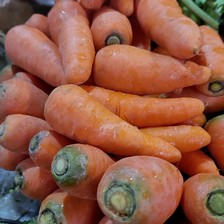

1/1 [==============================] - 1s 1s/step
Predicted label: Carrot


In [3]:
# Load the trained Keras model
model_path = '/content/drive/MyDrive/Vegetable_Dataset/modelo/FruitModel.h5'
model = load_model(model_path)

# Define the class labels using a dictionary
class_labels = {
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal',
    4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot',
    8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato',
    12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'
}

# Create an upload button
upload_button = widgets.FileUpload(accept='image/*', multiple=False)

# Display the upload button
display(upload_button)

def on_image_upload(change):
    # Get the uploaded file
    uploaded_file = next(iter(change['new'].values()))
    # Convert the uploaded file to a PIL Image
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Display the image
    display(image)

    # Define the transformations: resize, center crop, convert to array, and normalize
    def preprocess_image(image, target_size):
        if image.mode != "RGB":
            image = image.convert("RGB")
        image = image.resize(target_size)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = image / 255.0  # Normalize the image
        return image

    # Preprocess the image
    processed_image = preprocess_image(image, target_size=(224, 224))

    # Perform inference
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Display the predicted label
    print("Predicted label:", predicted_label)

# Attach the handler to the upload button
upload_button.observe(on_image_upload, names='value')
